In [46]:
#IMPORTING PACKAGES

import pandas as pd    #data processing 
import numpy as np     #To work with arrays
import matplotlib.pyplot as plt #for visualization
import itertools 

from sklearn.preprocessing import StandardScaler #data normalization 
from sklearn.model_selection import train_test_split #data split
from sklearn.tree import DecisionTreeClassifier  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 

# EVALUATING CLASSIFIERS 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

In [47]:
df = pd.read_csv('creditcard.csv')
df.drop('Time', axis=1 ,inplace = True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [48]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0 ])
fraud_count = len(df[df.Class == 1 ])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))
print('--------------------------------------------')

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [49]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('CASE AMOUNT STATISTICS')
print('--------------------------------------------')
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('--------------------------------------------')
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())
print('--------------------------------------------')

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [50]:
sc = StandardScaler()   # z = (x - u) / s (NORMALIZATION) 
amount = df['Amount'].values 

df['Amount'] = sc.fit_transform(amount.reshape(-1,1))
print(df['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [51]:
#DATA SPLIT 
X = df.drop('Class', axis = 1).values
y = df['Class'].values


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

print('X_train samples: ', X_train[:1])
print('X_test samples: ', X_test[0:1])
print('y_train samples: ',y_train[0:20])
print('y_test samples: ', y_test[0:20])

X_train samples:  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples:  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [52]:
# DECISION TREE 

tree_model = DecisionTreeClassifier(max_depth = 4, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_y = tree_model.predict(X_test)

# LOGISTIC REGRESSION 

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y = lr.predict(X_test)

# RANDOM FOREST TREE 

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_y = rf.predict(X_test)



In [8]:
#ACCURACY SCORE 

print("Accuracy Score")
print('------------------------------------------------------------------------')
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test,tree_y)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test,lr_y)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test,rf_y)))


Accuracy Score
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9993153330290369


In [9]:
#F1 SCORE 

print('F1 SCORE')
print('------------------------------------------------------------------------')
print('F1 score of Decision Tree model is {}'.format(f1_score(y_test,tree_y)))
print('------------------------------------------------------------------------')
print('F1 score of Logistic Regression is {}'.format(f1_score(y_test, lr_y)))
print('------------------------------------------------------------------------')
print('F1 score of Random Forest Tree model is {}'.format(f1_score(y_test,rf_y)))

F1 SCORE
------------------------------------------------------------------------
F1 score of Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of Logistic Regression is 0.7356321839080459
------------------------------------------------------------------------
F1 score of Random Forest Tree model is 0.7796610169491525


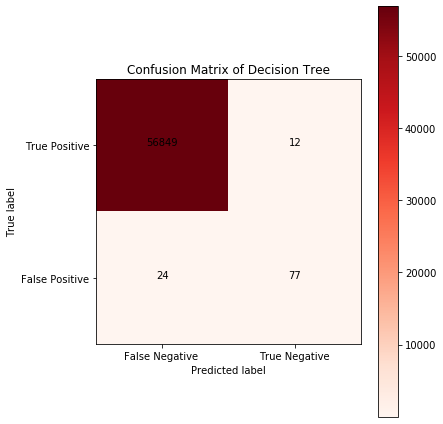

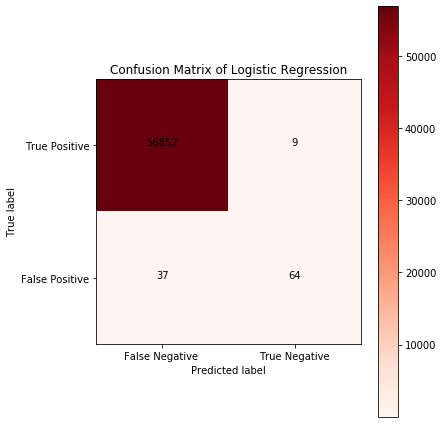

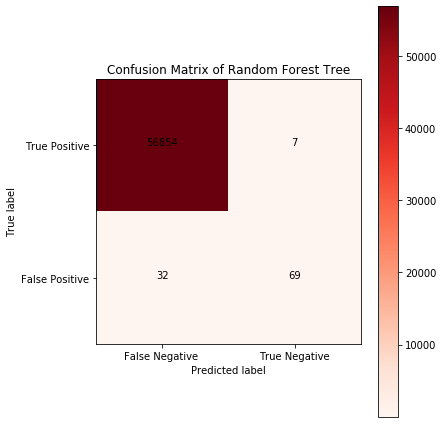

In [45]:
# CONFUSION MATRIX

def plot_confusion_matrix(cm, classes_x,classes_y, title,cmap = plt.cm.Reds):
    title = 'Confusion Matrix of {}'.format(title)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes_x))
    plt.xticks(tick_marks, classes_x)
    plt.yticks(tick_marks, classes_y)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment = 'center',
                 color = 'Black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# DECISION TREE

tree_matrix = confusion_matrix(y_test, tree_y, labels = [0, 1])

# LOGISTIC REGRESSION
lr_matrix = confusion_matrix(y_test, lr_y, labels = [0, 1])

# RANDOM FOREST 
rf_matrix = confusion_matrix(y_test, rf_y, labels = [0, 1])


plt.rcParams['figure.figsize'] = (6, 6)

# Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes_x = ['False Negative ','True Negative'],classes_y = ['True Positive','False Positive'], 
                                title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# LOGISTIC REGRESSION
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes_x = ['False Negative ','True Negative'],classes_y = ['True Positive','False Positive'],
                                title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# RANDOM FOREST 

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes_x = ['False Negative ','True Negative'],classes_y = ['True Positive','False Positive'],
                                title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()